In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

In [3]:
result = requests.get('https://wuzzuf.net/search/jobs')

In [4]:
result

<Response [200]>

In [6]:
# content
src = result.content

In [7]:
# parse
soup = BeautifulSoup(src, 'lxml')

In [8]:
soup

<!DOCTYPE html>
<html lang="en" translate="no">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<meta content="Thu Dec 08 2022 18:30:44 GMT+0200" http-equiv="expires"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
<meta content="notranslate" name="googlebot"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"/><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"/><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job

In [9]:
# title
soup.title

<title data-react-helmet="true">Job Search | WUZZUF</title>

In [10]:
soup.title.text

'Job Search | WUZZUF'

In [11]:
soup.title.attrs

{'data-react-helmet': 'true'}

In [13]:
soup.a.attrs

{'aria-label': 'navigate to Wuzzuf homepage',
 'href': 'https://wuzzuf.net/jobs/egypt',
 'class': ['css-hkk6sn', 'e1d1tj9x0']}

In [14]:
soup.a.attrs['href']

'https://wuzzuf.net/jobs/egypt'

In [17]:
soup.find('a', {'class': 'css-o171kl', 'rel': 'noreferrer'}).text

'Head of English Department (American School )'

In [20]:
first_link = soup.find('a', {'class': 'css-o171kl', 'rel': 'noreferrer'})

In [22]:
first_link.attrs['href']

'https://wuzzuf.net/jobs/p/NV4OIZuwaS08-Head-of-English-Department-American-School-Manhattan-Schools-Cairo-Egypt'

In [23]:
soup.find_all('a', {'class': 'css-o171kl', 'rel': 'noreferrer'})

[<a class="css-o171kl" href="https://wuzzuf.net/jobs/p/NV4OIZuwaS08-Head-of-English-Department-American-School-Manhattan-Schools-Cairo-Egypt" rel="noreferrer" target="_blank">Head of English Department (American School )</a>,
 <a class="css-o171kl" href="https://wuzzuf.net/jobs/p/ZABpCubcDh34-Biology-Environmental-Science-Teacher-High-School-Manhattan-Schools-Cairo-Egypt" rel="noreferrer" target="_blank">Biology &amp; Environmental Science Teacher (High School)</a>,
 <a class="css-o171kl" href="https://wuzzuf.net/jobs/p/prwja6cDskDF-Quality-Assurance-Section-Head-Enkana-Printing-Inks-Giza-Egypt" rel="noreferrer" target="_blank">Quality Assurance Section Head</a>,
 <a class="css-o171kl" href="https://wuzzuf.net/jobs/p/fMKK84nvHzMr-Digital-Marketing-Specialist-Fab-Minds-Cairo-Egypt" rel="noreferrer" target="_blank">Digital Marketing Specialist</a>,
 <a class="css-o171kl" href="https://wuzzuf.net/jobs/p/n9bR6qghMrUW-foreign-teachers-for-an-international-school-in-kuwait-new-vision-interna

### Automate

In [24]:
soup

<!DOCTYPE html>
<html lang="en" translate="no">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<meta content="Thu Dec 08 2022 18:30:44 GMT+0200" http-equiv="expires"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
<meta content="notranslate" name="googlebot"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"/><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"/><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job

__Job Div__

In [27]:
first_job = soup.find('div', {'class': 'css-pkv5jc'})

In [28]:
first_job.text

'Head of English Department (American School )Manhattan Schools - Maadi, Cairo, Egypt 2 hours agoFull TimeExperienced · 3 - 5 Yrs of Exp · Operations/Management · Education/Teaching · Education · English'

In [31]:
# link
first_job.a.attrs['href']

'https://wuzzuf.net/jobs/careers/Manhattan-Schools-Egypt-14145'

In [42]:
# location
first_job.span.text.strip()

'Maadi, Cairo, Egypt'

In [44]:
# post time
first_job.find('div', {'class': 'css-4c4ojb'}).text

'2 hours ago'

In [46]:
# type
first_job.find('a', {'class': 'css-n2jc4m'}).text

'Full Time'

In [48]:
link_tags = first_job.find_all('a', {'class': 'css-o171kl'})
link_tags

[<a class="css-o171kl" href="https://wuzzuf.net/jobs/p/NV4OIZuwaS08-Head-of-English-Department-American-School-Manhattan-Schools-Cairo-Egypt" rel="noreferrer" target="_blank">Head of English Department (American School )</a>,
 <a class="css-o171kl" href="/a/Experienced-Jobs-in-Egypt">Experienced</a>,
 <a class="css-o171kl" href="/a/Operations-Management-Jobs-in-Egypt"> <!-- -->· <!-- -->Operations/Management</a>,
 <a class="css-o171kl" href="/a/Education-Teaching-Jobs-in-Egypt"> <!-- -->· <!-- -->Education/Teaching</a>]

In [59]:
title = link_tags[0]
level = link_tags[1]
key_words = link_tags[2:]

In [60]:
title.text

'Head of English Department (American School )'

In [61]:
level.text

'Experienced'

In [62]:
key_words = [tag.text.replace('· ', '').strip() for tag in key_words]
key_words

['Operations/Management', 'Education/Teaching']

__All Jobs__

In [67]:
jobs = soup.find_all('div', {'class': 'css-pkv5jc'})

In [68]:
len(jobs)

15

In [80]:
jobs = soup.find_all('div', {'class': 'css-pkv5jc'})

job_dict = {
    'link': [],
    'location': [],
    'time': [],
    'work_type': [],
    'title': [],
    'level': [],
    'key_words': [],
}

for job in jobs:
    try:
        link = job.a.attrs['href']  # link
        job_dict['link'].append(link)
    except:
        # no link speci
        job_dict['link'].append('NaN')
    
    location = job.span.text.strip()  # location
    job_dict['location'].append(location)

    time = job.find('div', {'class': 'css-4c4ojb'}).text  # time
    job_dict['time'].append(time)

    wrok_type = job.find('a', {'class': 'css-n2jc4m'}).text  # work_type
    job_dict['work_type'].append(wrok_type)

    link_tags = job.find_all('a', {'class': 'css-o171kl'})

    title = link_tags[0].text  # title
    job_dict['title'].append(title)

    level = link_tags[1].text  # level
    job_dict['level'].append(level)

    key_words = link_tags[2:]  # key_words
    key_words = [tag.text.replace('· ', '').strip() for tag in key_words]  # clean
    job_dict['key_words'].append(key_words)

In [82]:
# job_dict

__df__

In [83]:
df = pd.DataFrame(job_dict)

In [84]:
df

,link,location,time,work_type,title,level,key_words
0,https://wuzzuf.net/jobs/careers/Manhattan-Scho...,"Maadi, Cairo, Egypt",2 hours ago,Full Time,Head of English Department (American School ),Experienced,"[Operations/Management, Education/Teaching]"
1,https://wuzzuf.net/jobs/careers/Manhattan-Scho...,"Maadi, Cairo, Egypt",2 hours ago,Full Time,Biology & Environmental Science Teacher (High ...,Experienced,[Education/Teaching]
2,https://wuzzuf.net/jobs/careers/Enkana-printin...,"6th of October, Giza, Egypt",2 hours ago,Full Time,Quality Assurance Section Head,Manager,[Quality]
3,https://wuzzuf.net/jobs/careers/Fab-Minds-Egyp...,"Sheraton, Cairo, Egypt",2 hours ago,Full Time,Digital Marketing Specialist,Experienced,[Business Development]
4,https://wuzzuf.net/jobs/careers/new vision int...,"Kuwait City, Kuwait",2 hours ago,Full Time,foreign teachers for an international school i...,Experienced,[Education/Teaching]
5,https://wuzzuf.net/jobs/careers/The-Translatio...,"Maadi, Cairo, Egypt",1 hour ago,Full Time,Receivable Accountant,Entry Level,[Accounting/Finance]
6,https://wuzzuf.net/jobs/careers/GEMS-Education...,"Madinaty, Cairo, Egypt",1 hour ago,Full Time,Science HOD,Experienced,[Education/Teaching]
7,NaN,"Smouha, Alexandria, Egypt",1 hour ago,Full Time,Recruitment Officer,Experienced,[Human Resources]
8,https://wuzzuf.net/jobs/careers/Cubic-Egypt-94451,"Downtown, Cairo, Egypt",1 hour ago,Full Time,Technical Site/office Manager,Senior Management,[Engineering - Construction/Civil/Architecture...
9,https://wuzzuf.net/jobs/careers/In-To-Egypt-Eg...,"Nasr City, Cairo, Egypt",1 hour ago,Full Time,Sales Advisor,Experienced,[Sales/Retail]


In [95]:
def scrap_page(link):
    result = requests.get(link)
    src = result.content  # load
    soup = BeautifulSoup(src, 'lxml')  # parse
    
    # All Jobs Div Tag
    jobs = soup.find_all('div', {'class': 'css-pkv5jc'})
    
    # scraping
    for job in jobs:
        try:
            link = job.a.attrs['href']  # link
            job_dict['link'].append(link)
        except:
            # no link speci
            job_dict['link'].append('NaN')

        location = job.span.text.strip()  # location
        job_dict['location'].append(location)

        time = job.find('div', {'class': 'css-4c4ojb'}).text  # time
        job_dict['time'].append(time)

        wrok_type = job.find('a', {'class': 'css-n2jc4m'}).text  # work_type
        job_dict['work_type'].append(wrok_type)

        link_tags = job.find_all('a', {'class': 'css-o171kl'})

        title = link_tags[0].text  # title
        job_dict['title'].append(title)

        level = link_tags[1].text  # level
        job_dict['level'].append(level)

        key_words = link_tags[2:]  # key_words
        key_words = [tag.text.replace('· ', '').strip() for tag in key_words]  # clean
        job_dict['key_words'].append(key_words)

In [103]:
for i in range(10):  # [0: 9]
    url = f'https://wuzzuf.net/search/jobs?start={i}'
    print(url)

https://wuzzuf.net/search/jobs?start=0
https://wuzzuf.net/search/jobs?start=1
https://wuzzuf.net/search/jobs?start=2
https://wuzzuf.net/search/jobs?start=3
https://wuzzuf.net/search/jobs?start=4
https://wuzzuf.net/search/jobs?start=5
https://wuzzuf.net/search/jobs?start=6
https://wuzzuf.net/search/jobs?start=7
https://wuzzuf.net/search/jobs?start=8
https://wuzzuf.net/search/jobs?start=9


In [98]:
# make a dict for (df)
job_dict = {
    'link': [],
    'location': [],
    'time': [],
    'work_type': [],
    'title': [],
    'level': [],
    'key_words': [],
}

# scrap 10 pages
for i in range(10):  # [0: 9]
    url = f'https://wuzzuf.net/search/jobs?start={i}'
    scrap_page(url)

In [99]:
job_dict

{'link': ['https://wuzzuf.net/jobs/careers/Ejad-Egypt-98581',
  'https://wuzzuf.net/jobs/careers/Sharm Dreams Group-Egypt-86374',
  'https://wuzzuf.net/jobs/careers/Shiny-white-dental-center-Egypt-30357',
  'https://wuzzuf.net/jobs/careers/Abdullah Abdulghani & Bros.Co. (AAB)-Qatar-92658',
  'https://wuzzuf.net/jobs/careers/City Centre Rotana-Qatar-91752',
  'https://wuzzuf.net/jobs/careers/Practical-Solutions-LLC-Egypt-9699',
  'https://wuzzuf.net/jobs/careers/Nesma Holding-Saudi Arabia-99269',
  'https://wuzzuf.net/jobs/careers/Webhelp-Egypt-57662',
  'https://wuzzuf.net/jobs/careers/Grand Rotana Resort & Spa-Egypt-93759',
  'https://wuzzuf.net/jobs/careers/University of Doha for Science and Technology (UDST)-Qatar-91654',
  'https://wuzzuf.net/jobs/careers/Park Rotana-United Arab Emirates-91669',
  'https://wuzzuf.net/jobs/careers/University of Doha for Science and Technology (UDST)-Qatar-91654',
  'https://wuzzuf.net/jobs/careers/Fujairah Rotana Resort & Spa - Al Aqah Beach-United 

__df__

In [101]:
df = pd.DataFrame(job_dict)

In [102]:
df

,link,location,time,work_type,title,level,key_words
0,https://wuzzuf.net/jobs/careers/Ejad-Egypt-98581,"Dokki, Giza, Egypt",2 hours ago,Full Time,Digital Marketing Specialist,Experienced,"[IT/Software Development, Marketing/PR/Adverti..."
1,https://wuzzuf.net/jobs/careers/Sharm Dreams G...,"Manial, Cairo, Egypt",2 hours ago,Full Time,Real Estate Sales.,Experienced,[Sales/Retail]
2,https://wuzzuf.net/jobs/careers/Shiny-white-de...,"Maadi, Cairo, Egypt",2 hours ago,Full Time,Organization Development Specialist,Experienced,"[Human Resources, Medical/Healthcare, Analyst/..."
3,https://wuzzuf.net/jobs/careers/Abdullah Abdul...,"Doha, Qatar",2 hours ago,Full Time,Service Advisor,Not specified,"[Customer Service/Support, Sales/Retail, Engin..."
4,https://wuzzuf.net/jobs/careers/City Centre Ro...,"Doha, Qatar",2 hours ago,Full Time,Housekeeping Attendant,Not specified,"[Administration, Hospitality/Hotels/Food Servi..."
...,...,...,...,...,...,...,...
145,https://wuzzuf.net/jobs/careers/Amazon MENA-Un...,"Dubai, United Arab Emirates",1 hour ago,Full Time,"S&OP Program Manager, UFG",Not specified,"[Installation/Maintenance/Repair, IT/Software ..."
146,https://wuzzuf.net/jobs/careers/Amazon MENA-Un...,"Dubai, United Arab Emirates",1 hour ago,Full Time,Operations Lead,Not specified,"[Customer Service/Support, IT/Software Develop..."
147,https://wuzzuf.net/jobs/careers/Amazon MENA-Un...,"Riyadh, Saudi Arabia",1 hour ago,Full Time,Learning Associate,Not specified,"[Business Development, Marketing/PR/Advertisin..."
148,https://wuzzuf.net/jobs/careers/Amazon MENA-Un...,"Cairo, Egypt",1 hour ago,Full Time,"Investigations Manager I, Shopping Experience ...",Not specified,"[IT/Software Development, Quality, Engineering..."


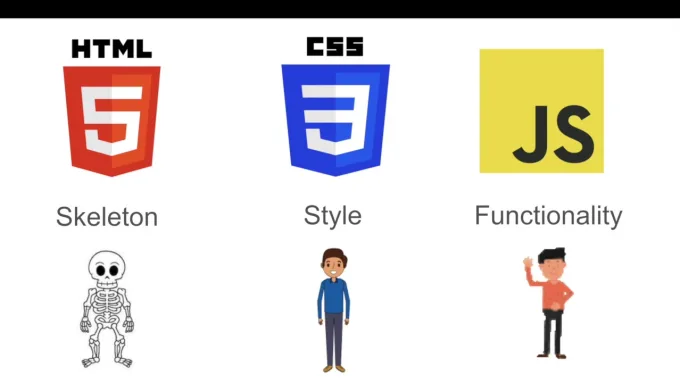

### Box Office

In [104]:
result = requests.get('https://www.boxofficemojo.com/year/?ref_=bo_nb_hm_secondarytab')

In [105]:
result

<Response [200]>

In [106]:
result.content

b'<!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);\n\n\n    var ue_err_chan = \'jserr-rw\';\n(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;

In [107]:
soup = BeautifulSoup(result.content, 'lxml')

In [108]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr-rw';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!

In [110]:
table_div = soup.find('div', {'id': 'table'})

__table__
1. tr --> row_tag
2. td --> cell_tag

__tr --> th__

In [132]:
# table headers
headers_tags = table_div.find_all('th') 
headers = []

for header_tag in headers_tags:
    headers.append(header_tag.text)

In [118]:
headers

['Year', 'Total Gross', '%± LY', 'Releases', 'Average', '#1 Release\n']

In [120]:
table = {h: [] for h in headers}

In [121]:
table

{'Year': [],
 'Total Gross': [],
 '%± LY': [],
 'Releases': [],
 'Average': [],
 '#1 Release\n': []}

In [123]:
headers

['Year', 'Total Gross', '%± LY', 'Releases', 'Average', '#1 Release\n']

In [128]:
td_tags = row.find_all('td')

for table_header, cell in zip(headers, td_tags):
    print(table_header, cell.text)

Year 2024
Total Gross $315,187,401
%± LY -
Releases 73
Average $4,317,635
#1 Release
 Wonka


__cells scrap__

In [133]:
for row in table_div.find_all('tr')[1:]:  # each row
    
    td_tags = row.find_all('td')  # cell tags
    for table_header, td_tag in zip(headers, td_tags):  # each cell
        cell_value = td_tag.text
        table[table_header].append(cell_value)
#         table['Year'].append('2024')  --> first_iteration
#         table['Total Gross'].append('$315,187,401')  --> second_iteration

In [134]:
table

{'Year': ['2024',
  '2023',
  '2022',
  '2021',
  '2020',
  '2019',
  '2018',
  '2017',
  '2016',
  '2015',
  '2014',
  '2013',
  '2012',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006',
  '2005',
  '2004',
  '2003',
  '2002',
  '2001',
  '2000',
  '1999',
  '1998',
  '1997',
  '1996',
  '1995',
  '1994',
  '1993',
  '1992',
  '1991',
  '1990',
  '1989',
  '1988',
  '1987',
  '1986',
  '1985',
  '1984',
  '1983',
  '1982',
  '1981',
  '1980',
  '1979',
  '1978',
  '1977',
  '2024',
  '2023',
  '2022',
  '2021',
  '2020',
  '2019',
  '2018',
  '2017',
  '2016',
  '2015',
  '2014',
  '2013',
  '2012',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006',
  '2005',
  '2004',
  '2003',
  '2002',
  '2001',
  '2000',
  '1999',
  '1998',
  '1997',
  '1996',
  '1995',
  '1994',
  '1993',
  '1992',
  '1991',
  '1990',
  '1989',
  '1988',
  '1987',
  '1986',
  '1985',
  '1984',
  '1983',
  '1982',
  '1981',
  '1980',
  '1979',
  '1978',
  '1977'],
 'Total Gross': ['$315,187,401'

__df__

In [135]:
pd.DataFrame(table)

,Year,Total Gross,%± LY,Releases,Average,#1 Release\n
0,2024,"$315,187,401",-,73,"$4,317,635",Wonka
1,2023,"$8,905,552,024",+20.8%,587,"$15,171,298",Barbie
2,2022,"$7,369,505,492",+64.4%,498,"$14,798,203",Top Gun: Maverick
3,2021,"$4,482,808,453",+112.1%,440,"$10,188,201",Spider-Man: No Way Home
4,2020,"$2,113,846,800",-81.4%,456,"$4,635,628",Bad Boys for Life
...,...,...,...,...,...,...
91,1981,"$898,686,960",-45.3%,56,"$16,047,981",Superman II
92,1980,"$1,642,400,771",+33.6%,68,"$24,152,952",Star Wars: Episode V - The Empire Strikes Back
93,1979,"$1,229,428,453",+48.8%,40,"$30,735,711",Superman
94,1978,"$826,413,013",+86.3%,13,"$63,570,231",Grease
